In [14]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import random
import matplotlib.pyplot as plt

In [15]:
train_ds, test_ds = tfds.load('cifar10', split=['train', 'test'], as_supervised=True)

In [16]:
train_data = []
train_labels = []

for example, label in train_ds:
  train_data.append(example.numpy())
  train_labels.append(label.numpy())

test_data = []
test_labels = []

for example, label in test_ds:
  test_data.append(example.numpy())
  test_labels.append(label.numpy())


train_data = np.array(train_data)
train_labels = np.array(train_labels)
test_data = np.array(test_data)
test_labels = np.array(test_labels)

print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


In [17]:
train_data = train_data / 255
test_data = test_data / 255

Text(0.5, 1.0, '7')

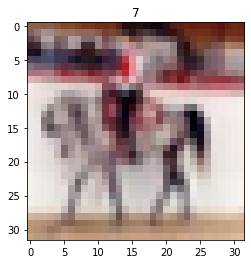

In [18]:
plt.imshow(train_data[0])
plt.title(train_labels[0])

In [19]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(64, 3, activation='relu', input_shape=(32,32,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


history = model.fit(train_data, train_labels,
                    epochs=5)

Epoch 1/5
1563/1563 [==============================] - 115s 73ms/step - loss: 1.6045 - accuracy: 0.4104
Epoch 2/5
1563/1563 [==============================] - 115s 74ms/step - loss: 1.2367 - accuracy: 0.5593
Epoch 3/5
1563/1563 [==============================] - 116s 74ms/step - loss: 1.0705 - accuracy: 0.6185
Epoch 4/5
1563/1563 [==============================] - 115s 74ms/step - loss: 0.9749 - accuracy: 0.6570
Epoch 5/5
1563/1563 [==============================] - 114s 73ms/step - loss: 0.9010 - accuracy: 0.6839


In [22]:
correct = [0]
incorrect = [0]

def predict(model, data, labels):

  data = tf.reshape(data, (1, 32, 32, 3))

  prediction = model.predict(data)
  prediction = prediction.argmax()

  print('Prediction: ', prediction)
  print('Label: ', labels)

  if prediction - labels == 0:
    print('Correct!')
    correct[0] += 1
  else:
    print('Incorrect!')
    incorrect[0] += 1

In [23]:
for _ in range(100):
  i = random.randint(0, 10000)
  predict(model=model, data=test_data[i], labels=test_labels[i])

Prediction:  6
Label:  6
Correct!
Prediction:  8
Label:  8
Correct!
Prediction:  9
Label:  9
Correct!
Prediction:  2
Label:  2
Correct!
Prediction:  3
Label:  7
Incorrect!
Prediction:  5
Label:  2
Incorrect!
Prediction:  2
Label:  2
Correct!
Prediction:  5
Label:  7
Incorrect!
Prediction:  9
Label:  9
Correct!
Prediction:  1
Label:  1
Correct!
Prediction:  5
Label:  6
Incorrect!
Prediction:  9
Label:  3
Incorrect!
Prediction:  2
Label:  5
Incorrect!
Prediction:  3
Label:  3
Correct!
Prediction:  7
Label:  7
Correct!
Prediction:  6
Label:  2
Incorrect!
Prediction:  1
Label:  6
Incorrect!
Prediction:  0
Label:  2
Incorrect!
Prediction:  7
Label:  3
Incorrect!
Prediction:  0
Label:  8
Incorrect!
Prediction:  1
Label:  1
Correct!
Prediction:  7
Label:  7
Correct!
Prediction:  1
Label:  0
Incorrect!
Prediction:  1
Label:  1
Correct!
Prediction:  2
Label:  2
Correct!
Prediction:  4
Label:  4
Correct!
Prediction:  7
Label:  7
Correct!
Prediction:  0
Label:  8
Incorrect!
Prediction:  0
Label: 

In [24]:
print(correct)
print(incorrect)

test_accuracy = correct[0] / (correct[0] + incorrect[0]) * 100 

print(round(test_accuracy, ndigits=3), '%')

[55]
[45]
55.0 %
